In [1]:
import json 
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd
import uproot as rt
import numpy as np
import awkward as ak
import scipy.constants as const
from scipy import interpolate
import time
import tqdm
import straxen
import strax
import cutax

In [2]:
import Hitlet_nv_simulator

You specified _auto_append_rucio_local=True and you are not on dali compute nodes,so we will add the following rucio local path:  /project/lgrandi/rucio/


/opt/XENONnT/anaconda/envs/XENONnT_2023.07.2/lib/python3.9/site-packages/straxen/url_config.py:756: UserWarning: From straxen version 2.1.0 onward, URLConfig parameterswill be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn(


In [3]:
import importlib
importlib.reload(Hitlet_nv_simulator)

You specified _auto_append_rucio_local=True and you are not on dali compute nodes,so we will add the following rucio local path:  /project/lgrandi/rucio/


<module 'Hitlet_nv_simulator' from '/home/layos/env_starter/Hitlet_nv_simulator.py'>

# 0. Hitlet Initialization

#### Hitlet initialize with the class 'Hitlet_nv'

In [4]:
#Hitlet initialize with the class 'Hitlet_nv' that takes 2 arguments: aux_nv_files(just giving the path to them) and a root file ('g4file')
path_nv_aux='/home/layos/env_starter/'

In [29]:
test_hitlet = Hitlet_nv_simulator.Hitlet_nv(path_nv_aux, '/project2/lgrandi/layos/output_n_Veto_neutron_AmBe_9.root')

# 1. Creating hitlets

### To create a hitlet from a root file it uses the 'nv_hitlets' function

In [30]:
#nv_hitlets takes at least two arguments: start and end entries of root files, but also the 'root_keys' related to primary particles parameters
hitlets_df, hitlets_nv, root_keys = test_hitlet.nv_hitlets(0,2000)

Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_9.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv


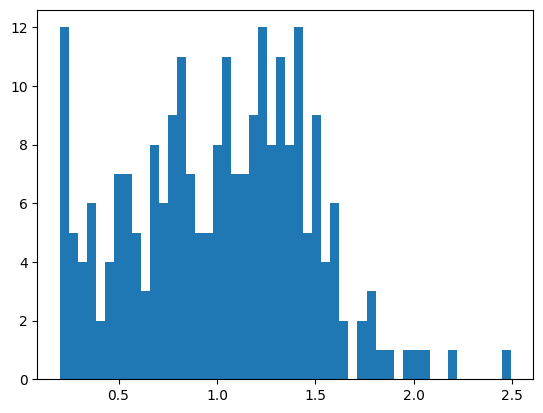

In [31]:
#the output is the following: hitlet_df(data_frame, hilet_nv(hitlets array format), root_keys
#Hitlets_df is usefull for the hitlets analysis
plt.hist(hitlets_df[hitlets_df.pmthitID==2000].pe_area.values, bins=50)
plt.show()

# 1.1 Creating events

In [32]:
#Hitlets_nv is an array to be computed by strax plugin, exemple
st = cutax.contexts.xenonnt_online()
strax_nv = st.get_single_plugin('0', 'events_nv')
events_nv = strax_nv.compute(hitlets_nv,min(hitlets_nv['time']),max(hitlets_nv['time']))

You specified _auto_append_rucio_local=True and you are not on dali compute nodes,so we will add the following rucio local path:  /project/lgrandi/rucio/


## 1. 2 Applying threshold per channel

In [33]:
#Here we can apply threshold per channel using dataframe
hitlets_nv_th = Hitlet_nv_simulator.df_to_hit_array(hitlets_df[hitlets_df.pe_area>=hitlets_df.threshold_acc])

In [34]:
events_nv_th = strax_nv.compute(hitlets_nv_th,min(hitlets_nv_th['time']),max(hitlets_nv_th['time']))

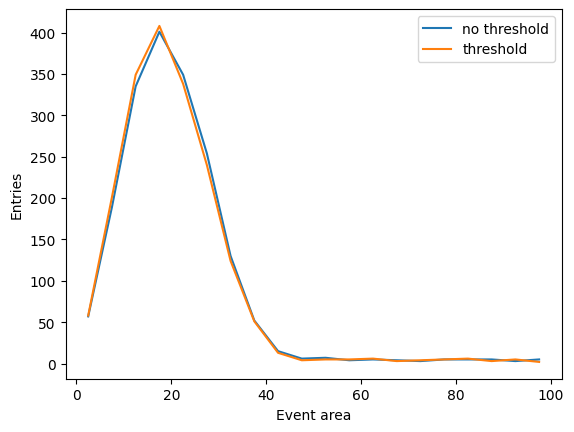

In [35]:
y,x = np.histogram(events_nv['area'], range=[0,100], bins=20)
x_c=(x[:-1] + x[1:]) / 2
y_th,x_th = np.histogram(events_nv_th['area'], range=[0,100], bins=20)
x_c_th=(x_th[:-1] + x_th[1:]) / 2
plt.plot(x_c,y, label='no threshold')
plt.plot(x_c_th, y_th, label='threshold')
plt.ylabel('Entries')
plt.xlabel('Event area')
plt.legend()
plt.show()

## 1.3 Recovering G4 primaries in events

In [13]:
#This is done by the funcion 'event_info_nv_from_hitlet', that uses original pmthittime of the events
events_nv_df,events_nv = Hitlet_nv_simulator.event_info_nv_from_hitlet(hitlets_df)

getting pri parameters


  0%|          | 0/4 [00:00<?, ?it/s]

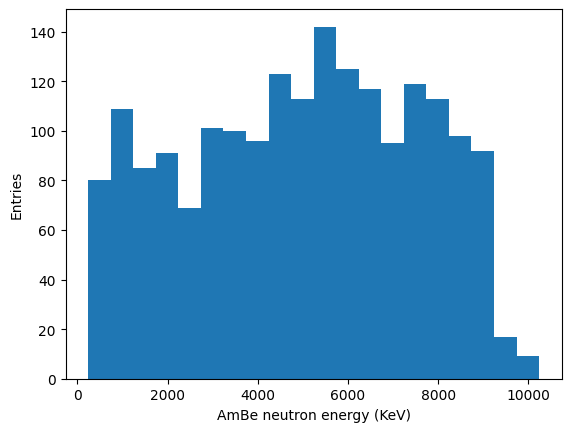

In [14]:
plt.hist(events_nv_df.e_pri.values,bins=20)
plt.ylabel('Entries')
plt.xlabel('AmBe neutron energy (KeV)')
plt.show()

# 2. Hitlets using root chuncked files

In [15]:
#This function initializes with the same arguments than 'nv_hitelts' + the number of chunks 'Number', however as it takes the path of root files, its for instance out of hitlet class
hitlets_df, hitlets_nv, root_keys = Hitlet_nv_simulator.hitlet_nv_chunks('/project2/lgrandi/layos/output_n_Veto_neutron_AmBe_',50, 0,2000, path_nv_aux, periods =(1/160)*1e9)

  0%|          | 0/50 [00:00<?, ?it/s]

Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_0.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_1.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_2.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_3.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_5.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_6.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_9.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_10.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_11.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_12.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_13.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_15.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_18.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_20.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_21.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_22.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_23.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_24.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_26.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_27.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_28.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_29.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_31.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_32.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_33.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_34.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_36.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_37.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_38.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_39.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_40.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_41.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_42.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_43.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_44.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_45.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_46.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv
Opening File : /project2/lgrandi/layos/output_n_Veto_neutron_AmBe_47.root
Applying QE and CE
Loading hit survive
Cutting Long events or Isotopes
Looking for stacket hitlets
Recovering values with stacket hitlets
Creating hitlet dataframe


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

getting time of hitlets_nv
Creating hitlets_nv


In [20]:
events_nv = strax_nv.compute(hitlets_nv,min(hitlets_nv['time']),max(hitlets_nv['time']))

In [21]:
hitlets_nv_th = Hitlet_nv_simulator.df_to_hit_array(hitlets_df[hitlets_df.pe_area>=hitlets_df.threshold_acc])
events_nv_th = strax_nv.compute(hitlets_nv_th,min(hitlets_nv_th['time']),max(hitlets_nv_th['time']))

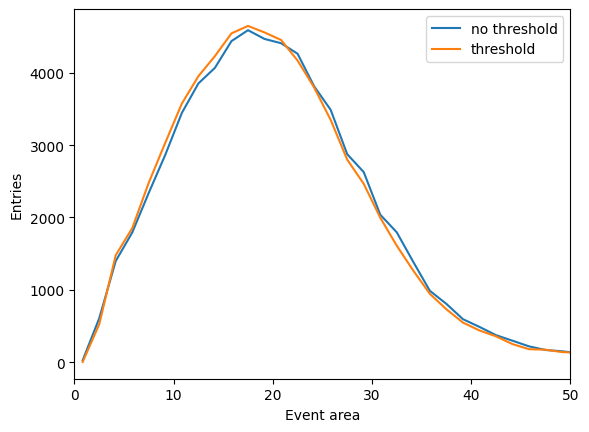

In [27]:
y,x = np.histogram(events_nv['area'], range=[0,100], bins=60)
x_c=(x[:-1] + x[1:]) / 2
y_th,x_th = np.histogram(events_nv_th['area'], range=[0,100], bins=60)
x_c_th=(x_th[:-1] + x_th[1:]) / 2
plt.plot(x_c,y, label='no threshold')
plt.plot(x_c_th, y_th, label='threshold')
plt.ylabel('Entries')
plt.xlabel('Event area')
plt.xlim(0,50)
plt.legend()
plt.show()

In [23]:
np.save('events_nv_th_test.npy', events_nv_th)